# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}

In [1]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

# Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)

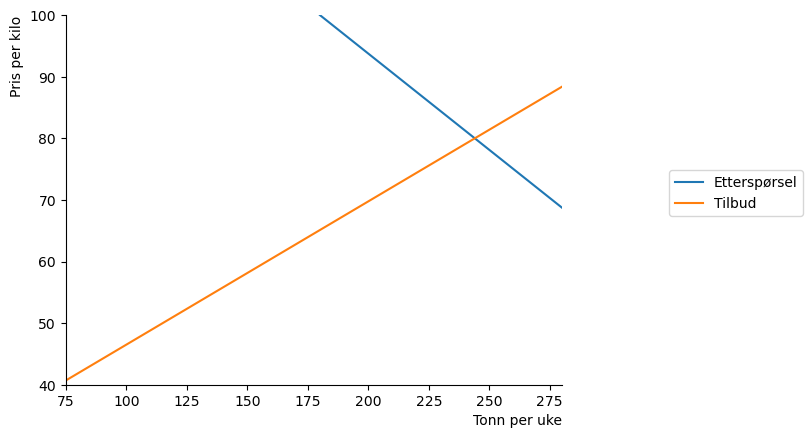

In [3]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


Helningen til den nye tilbudsfunksjonen er brattere fordi tilbyderne kompenserer for merverdiavgift.


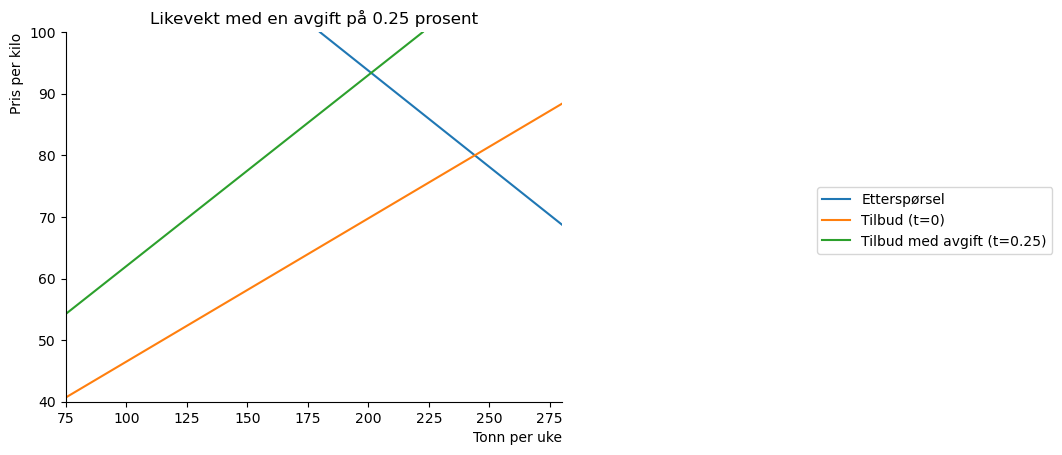

In [10]:
# Oppgave 1
# etterspørselsfunksjon 

def x_d(p,T):
    return 500 - 3.2*p*(1+T)

# tilbudsfunksjon 

def x_s(p,t):
    return -100+4.3*p*(1-t)

p_num=np.linspace(1,100,100)

# lager plot

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig2, ax = create_ax()

# plotter funksjonene

ax.plot(x_d(p_num,0),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud (t=0)')
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med avgift (t=0.25)')
ax.set_title('Likevekt med en avgift på 0.25 prosent')
ax.legend(bbox_to_anchor=(1.5,0.6));

print(f'Helningen til den nye tilbudsfunksjonen er brattere fordi tilbyderne kompenserer for merverdiavgift.')


In [14]:
# Oppgave 2
x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# lager ligninger

eq = sp.Eq(500-3.2*p,-100+4.3*p)
eq_mva = sp.Eq(500-3.2*p,-100+4.3*p*0.75)

# løser ligninger på p 

# gammelt tilbud:
sol_p = sp.solve(eq,p)
display(sol_p[0])

# nytt tilbud:
sol_p_mva = sp.solve(eq_mva,p)
display(sol_p_mva[0])

80.0000000000000

93.3852140077821

In [6]:
# Oppgave 3

# prisen som konsumenten på betale 
p_kons = round(sol_p_mva[0])
p_kons

93

In [7]:
# prisen som produsenten får
p_prod = round(sol_p_mva[0]*0.75)
p_prod

70

In [36]:
print(f'Konsumenten betaler nå '  + str(round(sol_p_mva[0]- sol_p[0])) + ' kroner mer enn tidligere, mens produsenten mottar ' + str(sol_p[0] - 70) + ' kroner mindre.')
print(f'Myndighetene får kroner ' + str(13+10) + '.')

print(f'Vi kan gjør dette om til prosent. Konsumenten betaler ' + str(round(13/23*100,2)) + ' % mens produsenten betaler ' + str(round(10/23*100,2)) + ' % av avgiften.')

Konsumenten betaler nå 13 kroner mer enn tidligere, mens produsenten mottar 10.0000000000000 kroner mindre.
Myndighetene får kroner 23.
Vi kan gjør dette om til prosent. Konsumenten betaler 56.52 % mens produsenten betaler 43.48 % av avgiften.


Text(0.5, 1.0, 'Likevekt med en avgift på 0.25 prosent')

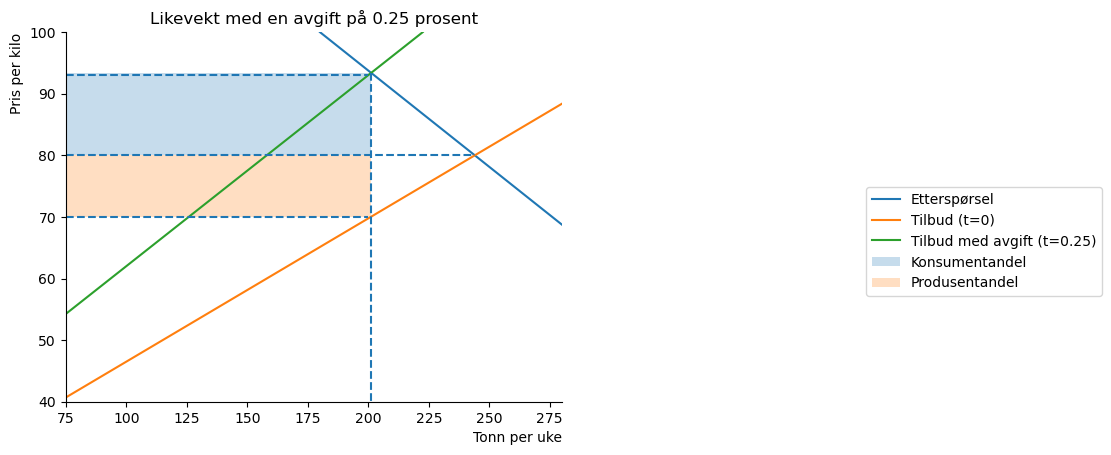

In [37]:
fig3, ax = create_ax()

# plotter funksjonene vi har laget tidligere
ax.plot(x_d(p_num,0),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud (t=0)')
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med avgift (t=0.25)')

ax.set_title('tilbud (med og uten MVA) og etterspørsel')
ax.legend(bbox_to_anchor=(1.5,0.6));

# lager linjer til prisen konsument betaler og produsent får.
ax.hlines(p_kons,75,200,linestyles='dashed', clip_on=False)
ax.hlines(p_prod,75,200,linestyles='dashed', clip_on=False)
ax.vlines(x_s(sol_p_mva[0],0.25),sol_p_mva[0],40, linestyles='dashed', clip_on=False)

# lager en linje til gammel likevekt. 
ax.hlines(sol_p,75,x_s(sol_p[0], 0),linestyles='dashed', clip_on=False)


# fyller mellom linjer slik at vi ser hva konsument og produsent betaler. 
q=np.linspace(75,201.167315175097,100)
    
ax.fill_between(q,93.3,80, alpha = 0.25, label = 'Konsumentandel')
ax.fill_between(q,70,80, alpha = 0.25, label = 'Produsentandel')
ax.legend(bbox_to_anchor=(1.6,0.6))
ax.set_title('Likevekt med en avgift på 0.25 prosent')

In [ ]:
# oppgave 4